In [0]:
#https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI
#http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf

#The perceptron


##The structural block of deep learning
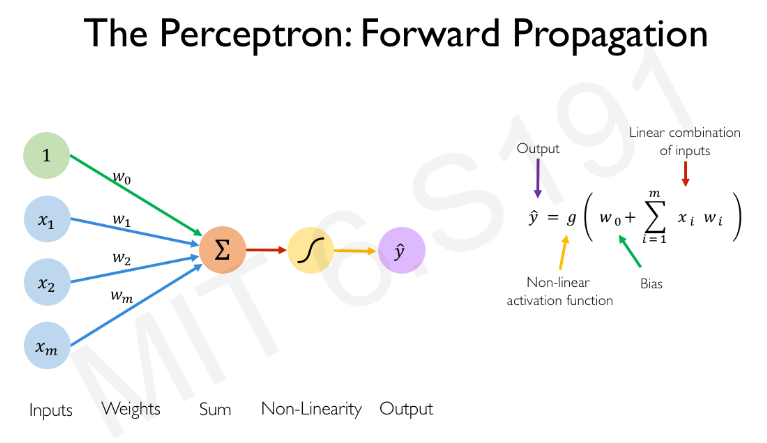

The forward propagation consists of a series of inputs, which have a corresponding weight. (w1...wn). And then you sum all of them.

Then you pass the sum into a non-linear activation function.

But there are also biases.

The bias term is just added not affected by the Linear combinaton of inputs and all the sums.

Using linear algebra, one can re-write the previous equation in terms of vectors and dot products.

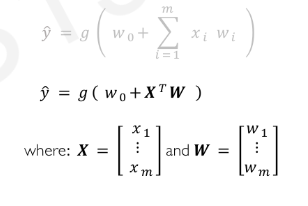

To compute the output of a single perceptron, you take the dot product of X and W (representing element-wise sumation and multiplication) and then apply the non-linearity (g)

###What is a non-linear activation function

a common example is the sigmoid function, which takes any real number as input on the X axis, and it transforms that value into a scalar ouput between 0 and 1

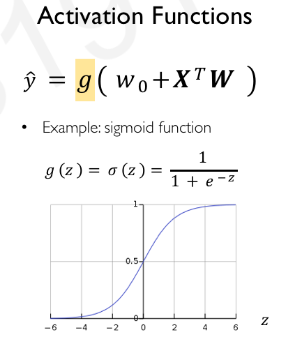

Sigmoid functions are commonly used as probability functions.

There are many common types of activation functions, for example:

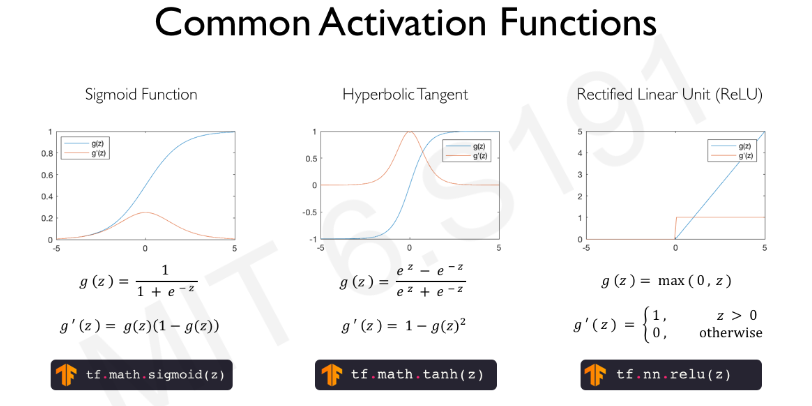

Why do we care about activation functions:
* Because they are used to introduce non-linearity to the data.

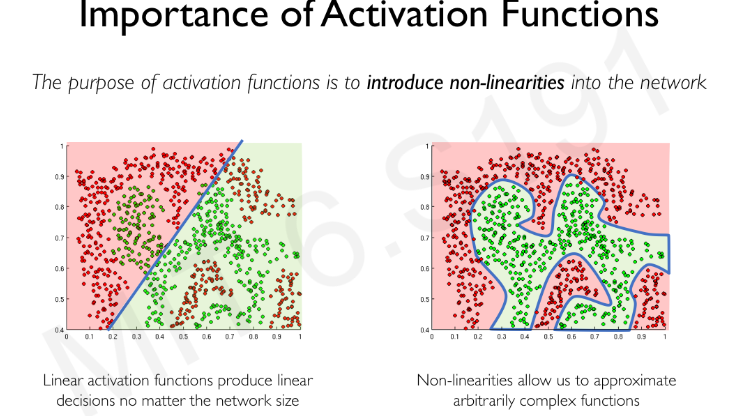

###Example of perceptrons.
Next the dot product is calculated with the inputs, the, the bias and the weights, which in the end gives you a 2D line

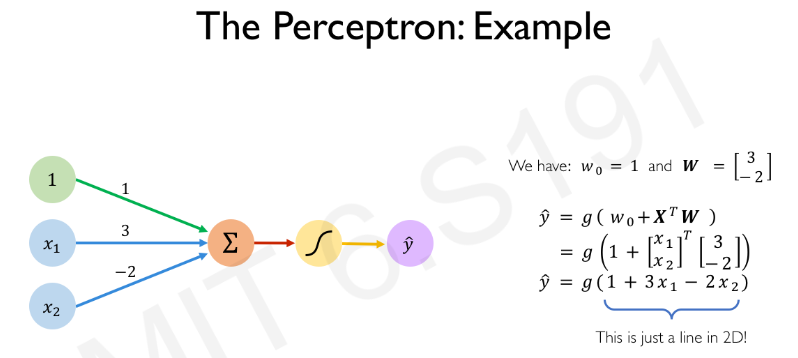

We can then plot the 2D line

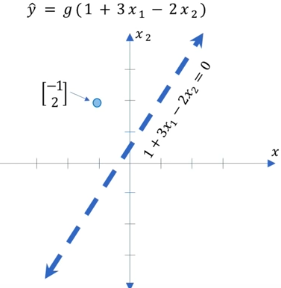

But note that we have an input, (the -1,2) it gives us a value of -6, which then we place on the sigmoid and it gives .002 (could be interpreted as a very low probability, or that it is highly likely to be on the left of the line. If it was .5, it would be exactly on the line, we are kindof dividing the plane into two sections)

#Building Neural Networks with Perceptrons

We have the same number of inputs, but we can add more perceptrons

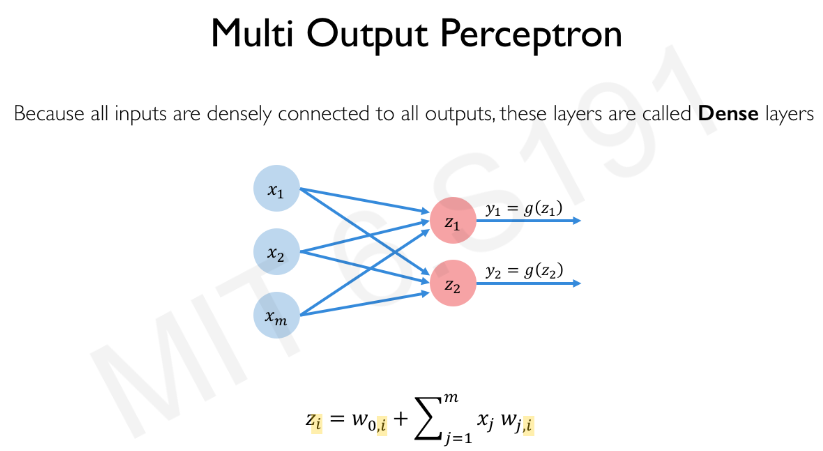

##Create a dense layer from scratch

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np

from keras.layers import Dense, Activation

TensorFlow 2.x selected.


Using TensorFlow backend.


In [0]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, input_dim, output_dim):
    #basically get the properties of a keras layer
    super(MyDenseLayer, self).__init__() #super https://realpython.com/python-super/
    

    #initialize wieghts and bias #add_weight is a property of keras layer.
    #I believe this is just initializing random?? weights of the shape input_dim and output_dim
    self.W = self.add_weight([input_dim, output_dim])
    self.b = self.add_weight([1, output_dim]) #because this is the bias the input_dim is 1
  
  def call(self, inputs):
    # Forward propagate the inputs
    z = tf.matmul(inputs, self.W) + self.b

    #feed thorugh a non-linear activation
    output = tf.math.sigmoid(z)

    return output

Instead of coding that from scratch, we just use the Tensorflow pre-made layers. the previous code is basically the same as:

`layer = tf.keras.layers.Dense(units = 2)`

In [0]:
layer = tf.keras.layers.Dense(units = 2)

###Single layer Neural Network

It is a bunch of connected perceptrons.

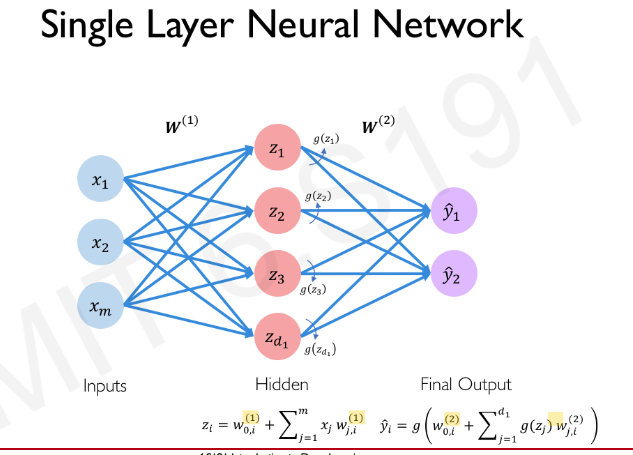

For example we can look at a single unit or perception (z2 for example), recieves its inputs, passes its output through the activation, and gives some new final output.

A single Sequential model can be coded as:

In [0]:
n = 3 #n is the number of outputs
model = tf.keras.Sequential([
  tf.keras.layers.Dense(n),
  tf.keras.layers.Dense(2)
])

I believe this is a simple two layer neural network, where you get n outputs and then pass those to the second layer that was 2 final outputs.

###Deep neural network

You literally just stack more of this layers.

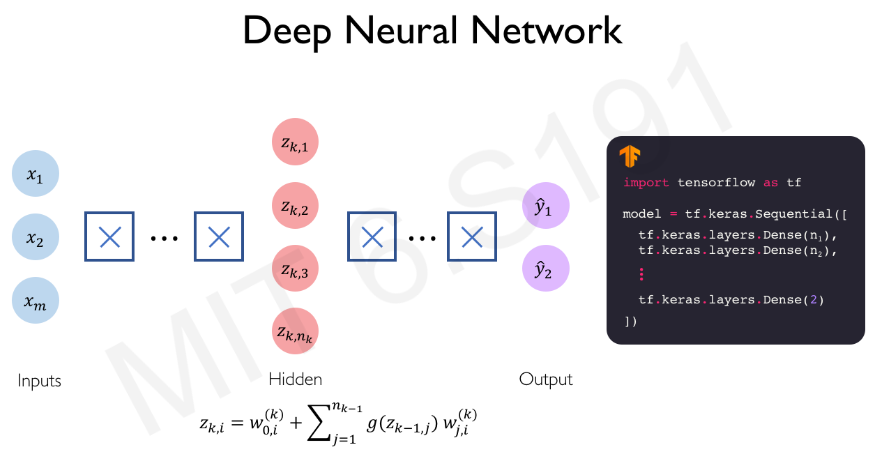

#Applying Neural Networks

##Example Problem

###Will I pass this class?

Starting with a two feature model:

* x1 = Number of lectures you attend.

* x2 = Hours spent on the final project.

We have the data from previous years, and we add a new person we have to predict if they pass the class

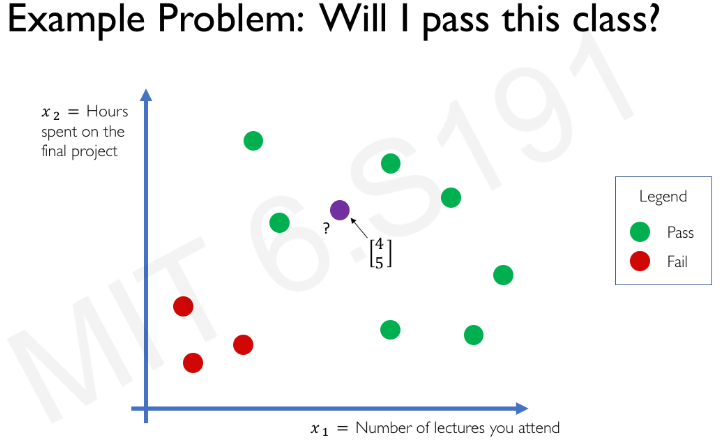

In untrained networks where weights have just been initialized, its predictions will be (almost allways) wrong. 

For example if we initialize a network and pass it our value, we will get basically a random answer. In the class they did this and the network predicted 10% probability of passing where the person actually passed.



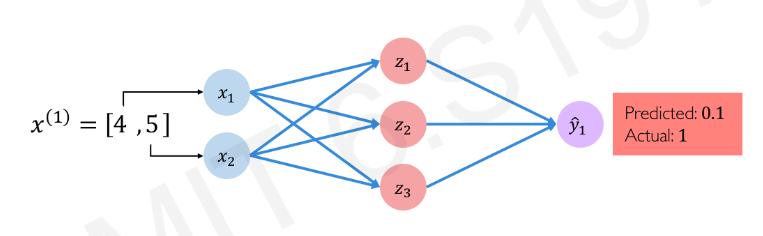

Just for the excercice i will build a model with a single layer and pass it the data.

In [6]:
ExampleInput = np.zeros((1,2)) 
#creo que el problema es que estas contando como 2 arrays  de 1, no 1 de 2
ExampleInput[0][0] = 4
ExampleInput[0][1] = 5 
print(ExampleInput.shape) #one batch with 2 values
ExampleInput

(1, 2)


array([[4., 5.]])

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, activation= 'relu', input_shape = (2,)),
  tf.keras.layers.Dense(1, activation= "sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.predict(ExampleInput)

array([[0.33390933]], dtype=float32)

###We have to train the model


The loss is expressed as the following:

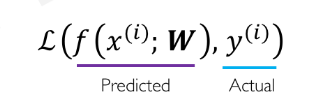

Now, our objective function to train the network on loss,for an empirical loss we calculate the loss for every single case and average it

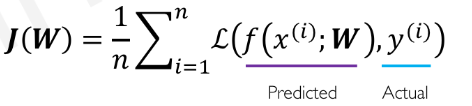

Now we can use many different loss types. One for this example is Binary Cross Entropy Loss.

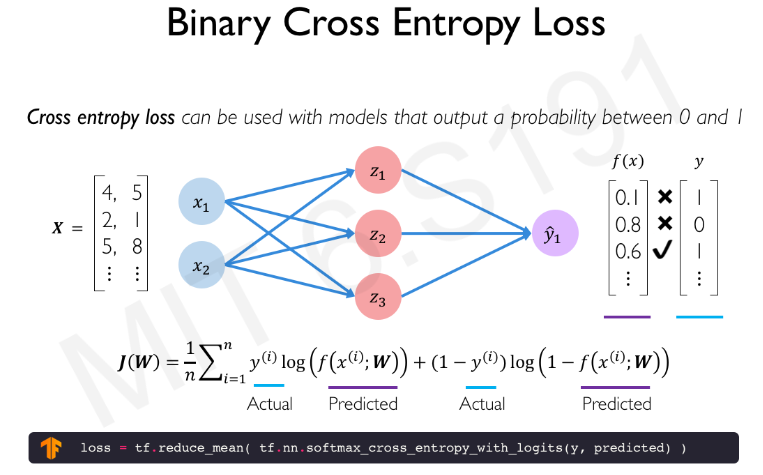

There are other loss functions like <a> Mean Squared Error Loss



###Loss Optimization


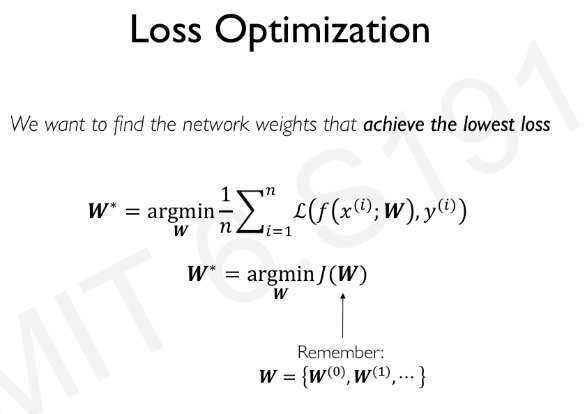

You want to find the value of every W to minimize the entire loss function.

NOTE: Remember that our loss function, is a simple function in terms of those weights.

NOTE2: In the slides, if we only had 2 weights in the model, we can plot weight vs weight vs loss

Basically we do a gradient Descent to minimize the loss. Which mean updating the weights after every iteration.



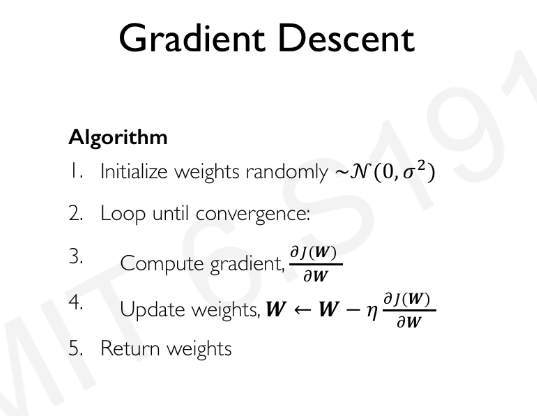

Coding the gradient Descent

In [0]:
"""
weights = tf.Variable([tf.random.normal((1,2))]) #get random weights

while True: #Loop forever
  with tf.GradientTape() as g:
    loss = compute_loss(weights)
    gradient = g.gradient(loss, weights) #How do we compute this
    #How do we know which way is the way to go.

  weights = weights - lr * gradient #lr is learning rate

"""
a = 2
#Not supposed to work

We have to use backpropagation to know how our gradients work. And computing them.

Basically the question is how a change in weight affects the final loss 

###Simple Neural network

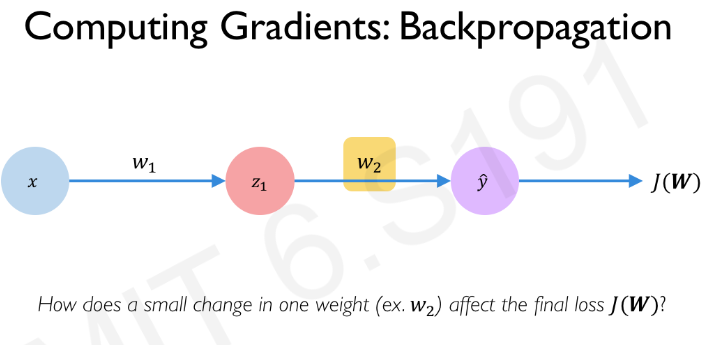

First we need to get w2.
If we change W2 in a differential manner, how much Output changes?

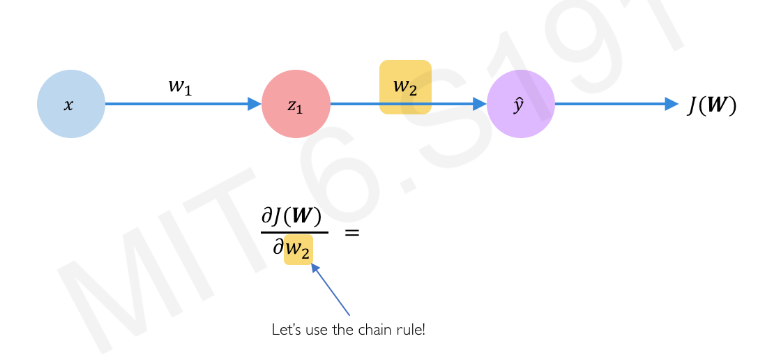

TO EVALALUATE THIS, we basically use the chain rule, which multiplies the gradient of our loss with respect to our output(y) by the gradient of our output(y) with respect to w2.




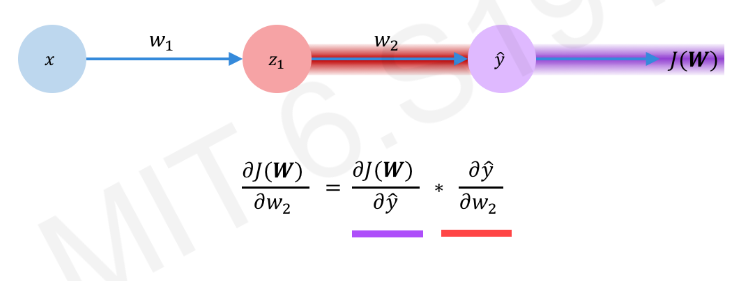

WE HAVE TO REPEAT THIS PROCESS WITH W1

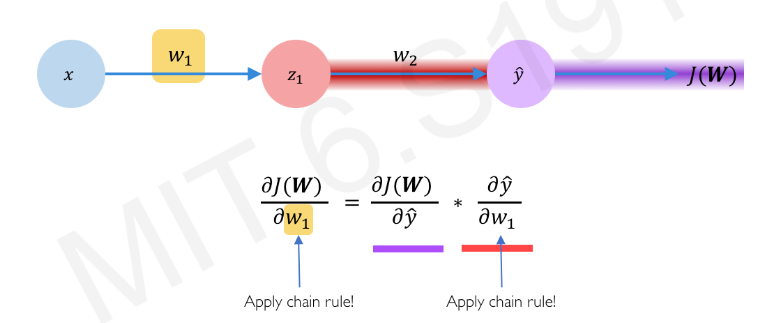

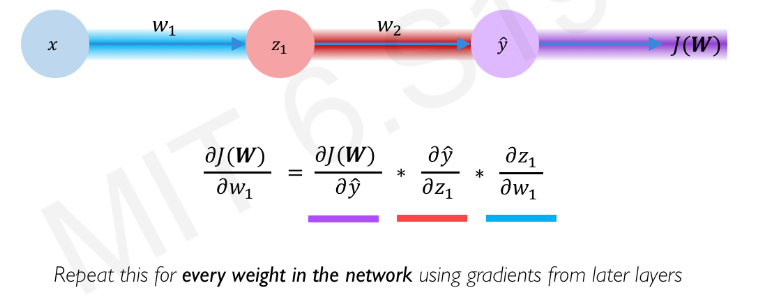

Now we have a "backpropagation" of all of the gradients from the output to the input. And this allows this gradients to be calculated in practice.

##Optimization

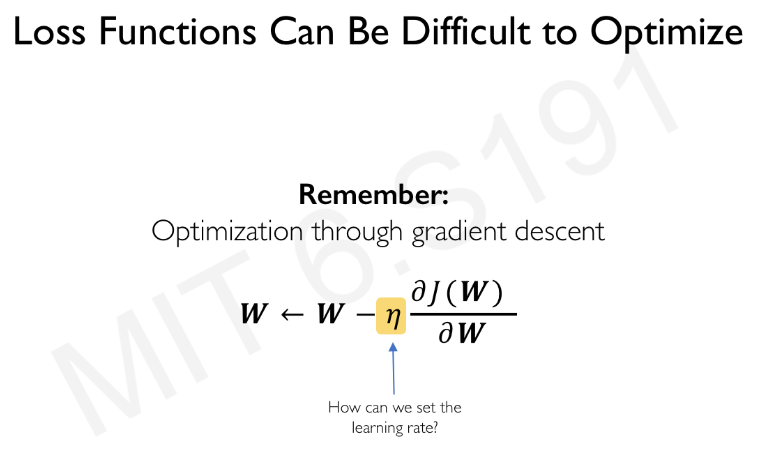

You want to set the laerning rate such that it is large enough to avoid local minima, but small enough that it still converges.

To set the learning rate:

1. You could just try a bunch of rates to see which works better.

2. Design an adaptative learning rate that "adapts" to the landscape

The #2 is the best choice.

Here LR are not fixed, and can be modified depending on the context.


#Gradient descent Algorithms



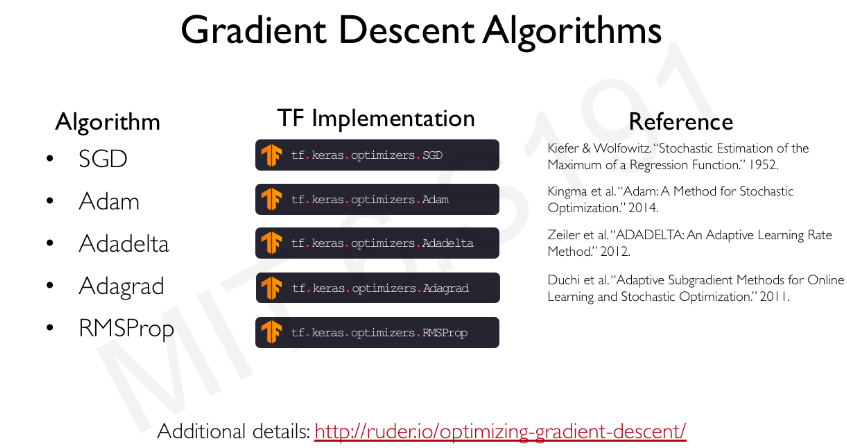

#Building a model

In [0]:
"""
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, activation= 'relu', input_shape = (2,)),
  tf.keras.layers.Dense(1, activation= "sigmoid")
])

optimizer = tf.keras.optimizer(RMSProp)

while True:
  prediction = model(x)

  with tf.GradientTape() as tape:
    loss = compute_loss(y, prediction)
  
  grads = tape.gradient(loss, model.trainable_variables) #get the gradients
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
"""
a = 2
#again does not run.

#BATCHES

This is done because backpropagation is very expensive computationally, and we have to do it only on certain data points. but:

* Do it on all the data points and its too computationally expensive.

* Do it on only one data point and its too noisy.

So we BATCH the data points to get a middle ground. This allow us to get increased accuracy and train the network faster



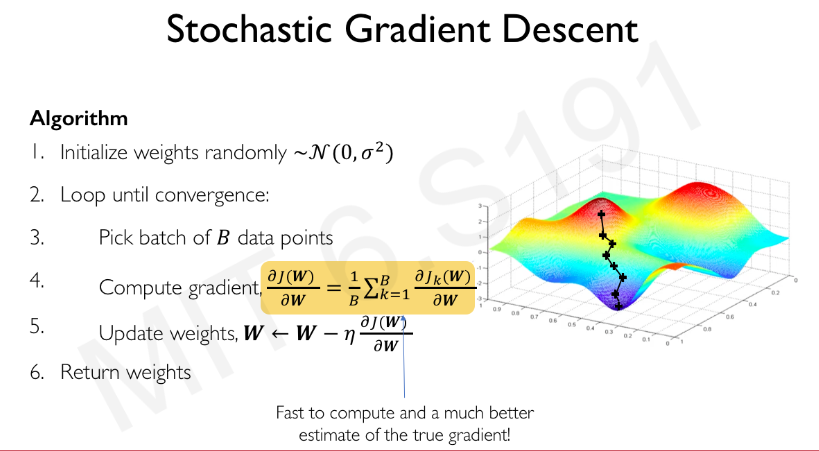

#Overfitting

In neural networks, overfitting exists.

Idealy you want a model to represent your data, that can generalize unseen test data.

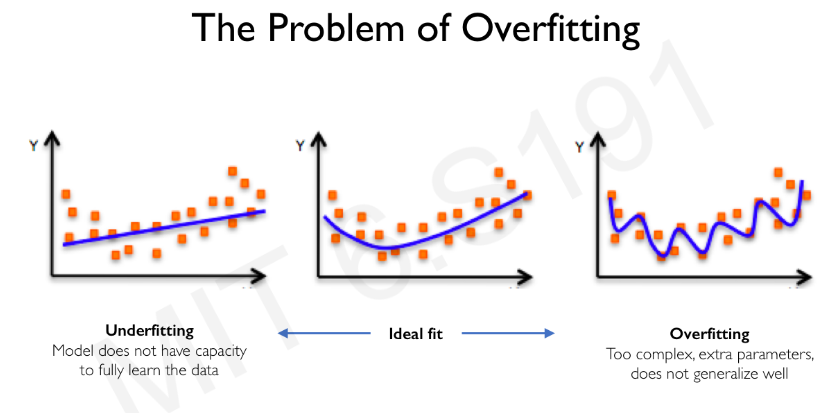

##To prevent overfitting we use regularization

There are regularization methods: for example:

* Dropout: it randomly sets some activations to zero (with some probability). `tf.keras.layers.Dropout(p=.5)`. Here it is forced to build a more robust representation and not rely, on a single "channel"

* Early Stopping: It stops training before it can overfit (Before it diverges from the Testing data)



###Dropout



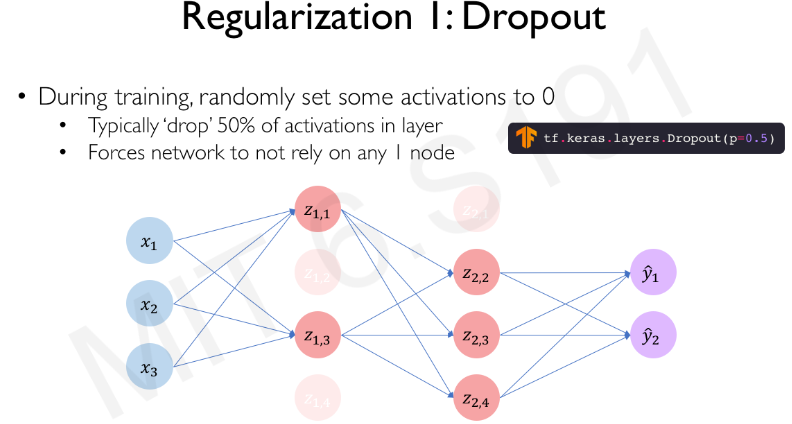

###Early Stopping

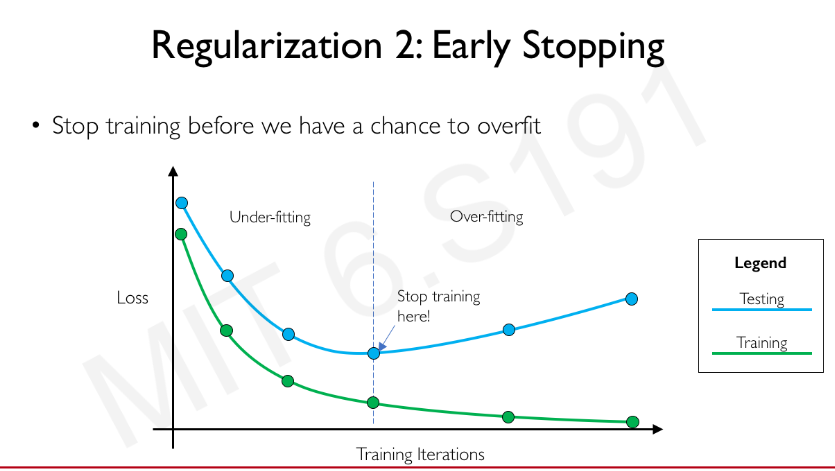

#Review



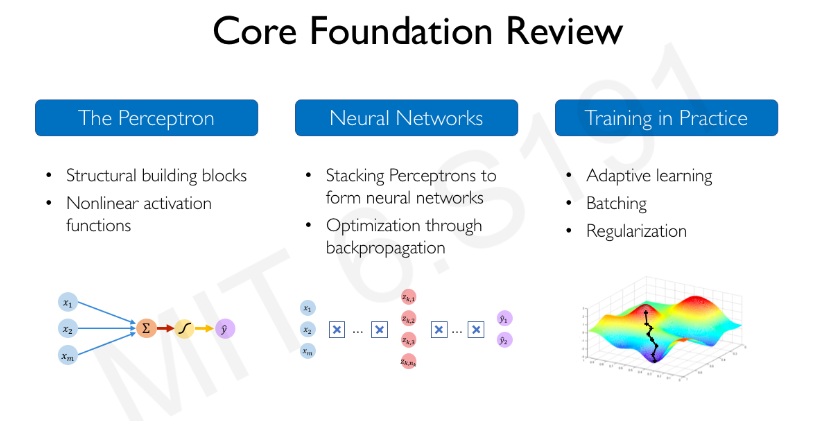